In [1]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading the CSV file
df=pd.read_csv("WA_Fn-UseC_-Sales-Win-Loss.csv")
df.head(5)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [3]:
# For getting the dimension of the dataset (number of rows, number of coumns)
df.shape

(78025, 19)

In [4]:
# For getting the information about the null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
Opportunity Number                         78025 non-null int64
Supplies Subgroup                          78025 non-null object
Supplies Group                             78025 non-null object
Region                                     78025 non-null object
Route To Market                            78025 non-null object
Elapsed Days In Sales Stage                78025 non-null int64
Opportunity Result                         78025 non-null object
Sales Stage Change Count                   78025 non-null int64
Total Days Identified Through Closing      78025 non-null int64
Total Days Identified Through Qualified    78025 non-null int64
Opportunity Amount USD                     78025 non-null int64
Client Size By Revenue                     78025 non-null int64
Client Size By Employee Count              78025 non-null int64
Revenue From Client Past Two Years         78025 non-n

In [5]:
# Printing the different unique values present in Region column
df["Region"].unique()

array(['Northwest', 'Pacific', 'Midwest', 'Southwest', 'Mid-Atlantic',
       'Northeast', 'Southeast'], dtype=object)

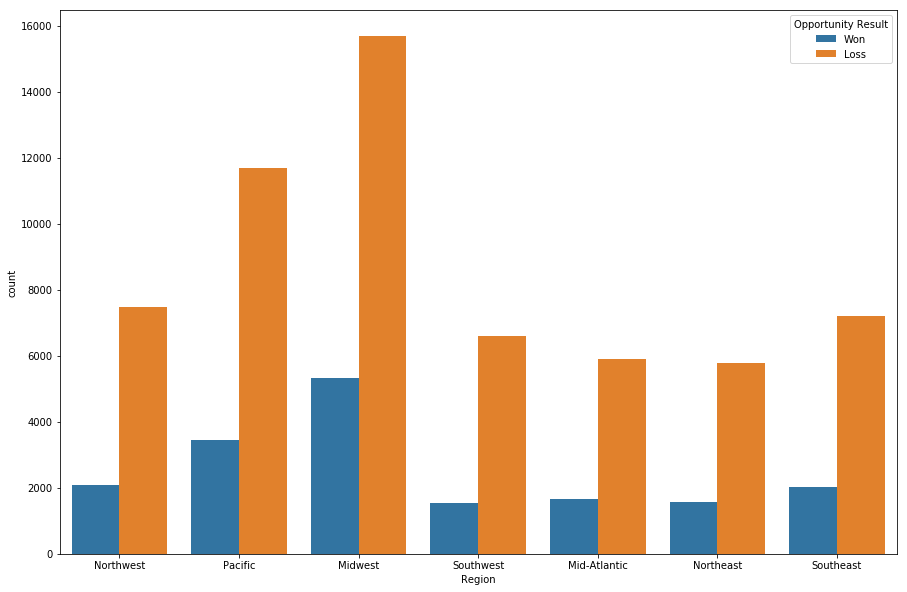

In [6]:
plt.figure(figsize=(15,10))
# create a countplot
sns.countplot('Region',data=df,hue = 'Opportunity Result')

From the plot, we see that Loss is always more than Won and Lose is maximum in Midwest Region. Won is maximum in Midwest Region

In [7]:
# Printing the different unique values present in Supplies Group column
df["Supplies Group"].unique()

array(['Car Accessories', 'Performance & Non-auto', 'Tires & Wheels',
       'Car Electronics'], dtype=object)

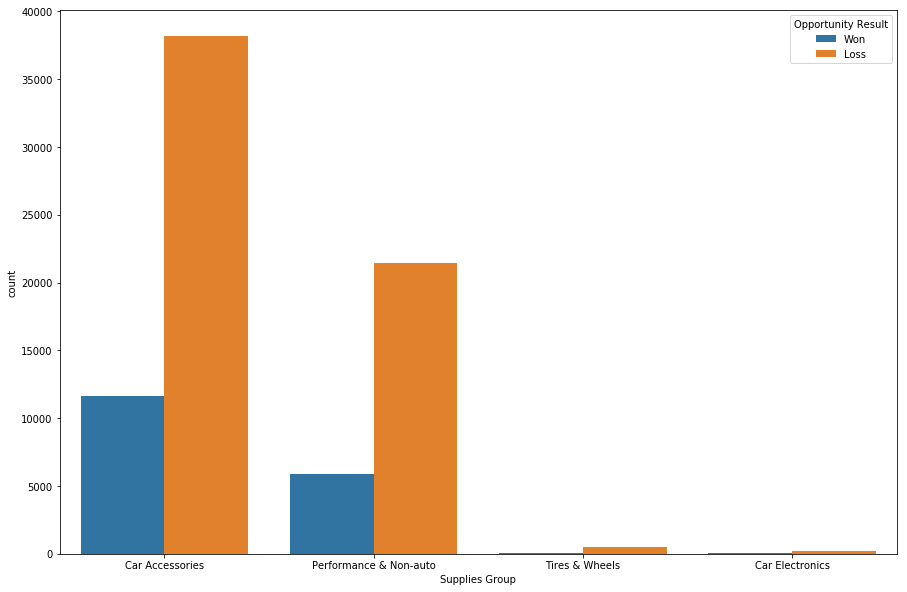

In [8]:
plt.figure(figsize=(15,10))
# create a countplot
sns.countplot('Supplies Group',data=df,hue = 'Opportunity Result')

From the plot, we see that Loss is always more than Won and Lose is maximum in the case of Car Accessories Supplies Group. Won is maximum in the case of Car Accessories Supplies Group

In [9]:
# Printing the different unique values present in Supplies Sungroup column
df["Supplies Subgroup"].unique()

array(['Exterior Accessories', 'Motorcycle Parts', 'Shelters & RV',
       'Garage & Car Care', 'Batteries & Accessories',
       'Performance Parts', 'Towing & Hitches', 'Replacement Parts',
       'Tires & Wheels', 'Interior Accessories', 'Car Electronics'],
      dtype=object)

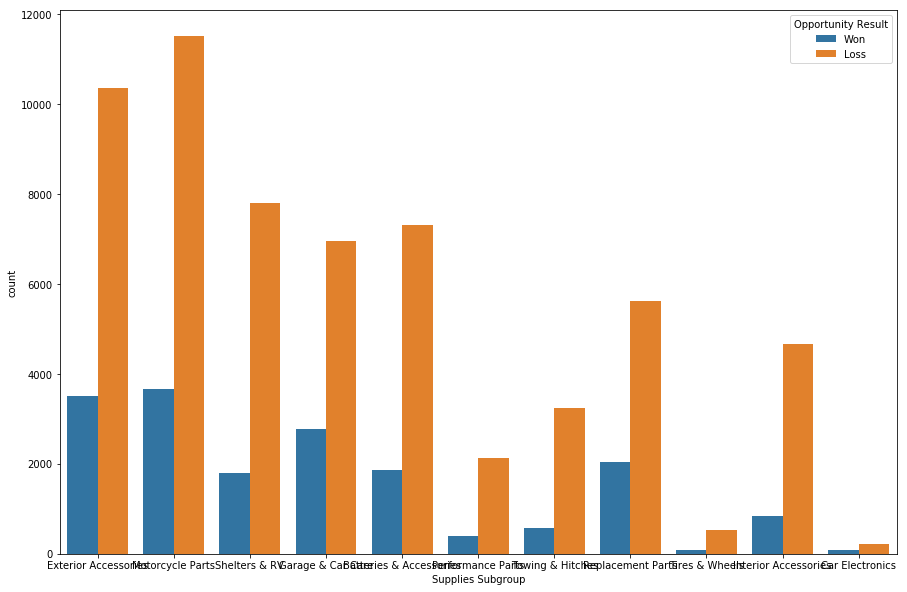

In [10]:
plt.figure(figsize=(15,10))
# create a countplot
sns.countplot('Supplies Subgroup',data=df,hue = 'Opportunity Result')

From the plot, we see that Loss is always more than Won and Lose is maximum in the case of Motorcycle Parts Supplies Subgroup. Won is maximum in the case of Motorcycle Parts Supplies Subgroup

In [11]:
# Printing the different unique values present in Route To Market column
df["Route To Market"].unique()

array(['Fields Sales', 'Reseller', 'Other', 'Telesales', 'Telecoverage'],
      dtype=object)

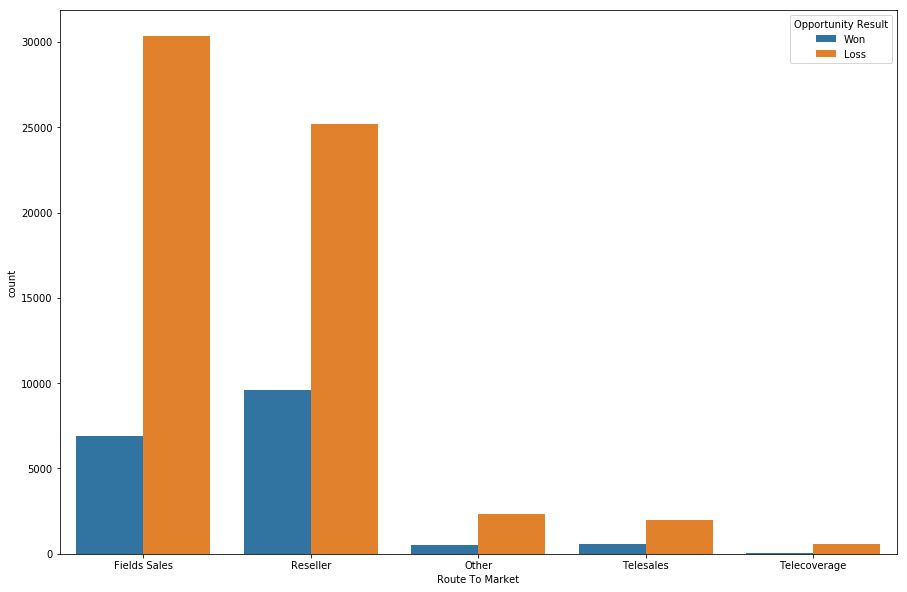

In [12]:
plt.figure(figsize=(15,10))
# create a countplot
sns.countplot('Route To Market',data=df,hue = 'Opportunity Result')

From the plot, we see that Loss is always more than Won and Lose is maximum in the case of Fields Sales. Won is maximum in the case of Reseller

In [13]:
# Printing the different unique values present in Competitor Type column
df["Competitor Type"].unique()

array(['Unknown', 'Known', 'None'], dtype=object)

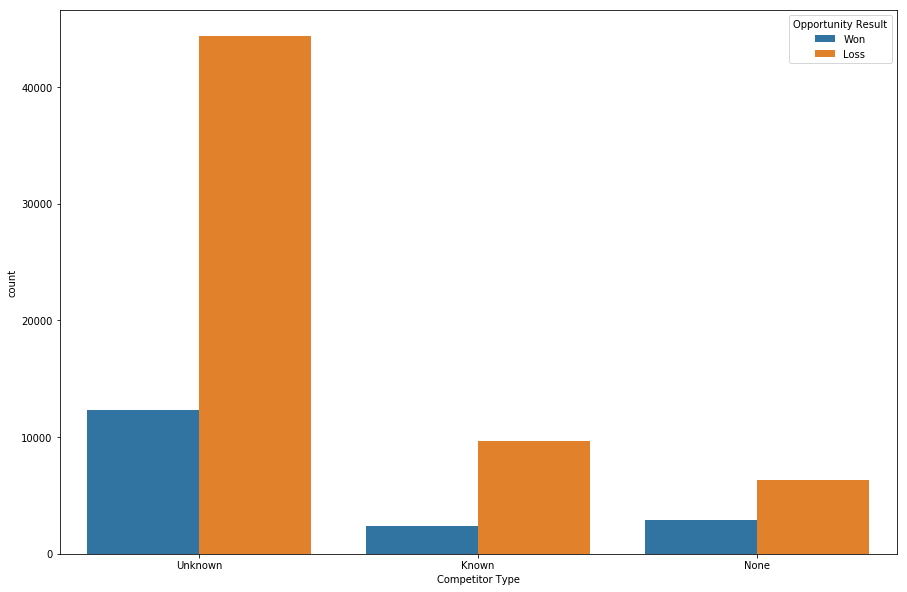

In [14]:
plt.figure(figsize=(15,10))
# create a countplot
sns.countplot('Competitor Type',data=df,hue = 'Opportunity Result')

From the plot, we see that Loss is always more than Won and Lose is maximum in the case of Unknown Competitor Type. Won is maximum in the case of Unknown Competitor Type.

In [15]:
# Printing the different unique values present in Opportunity Result column
df["Opportunity Result"].unique()

array(['Won', 'Loss'], dtype=object)

In [16]:
# create the Labelencoder object
le = LabelEncoder()

#convert the categorical columns into numeric
df['Supplies Subgroup'] = le.fit_transform(df['Supplies Subgroup'])
df['Region'] = le.fit_transform(df['Region'])
df['Route To Market'] = le.fit_transform(df['Route To Market'])
df['Opportunity Result'] = le.fit_transform(df['Opportunity Result'])
df['Competitor Type'] = le.fit_transform(df['Competitor Type'])
df['Supplies Group'] = le.fit_transform(df['Supplies Group'])

#display the initial records
df.head(5)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [17]:
# For getting the information about the null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
Opportunity Number                         78025 non-null int64
Supplies Subgroup                          78025 non-null int64
Supplies Group                             78025 non-null int64
Region                                     78025 non-null int64
Route To Market                            78025 non-null int64
Elapsed Days In Sales Stage                78025 non-null int64
Opportunity Result                         78025 non-null int64
Sales Stage Change Count                   78025 non-null int64
Total Days Identified Through Closing      78025 non-null int64
Total Days Identified Through Qualified    78025 non-null int64
Opportunity Amount USD                     78025 non-null int64
Client Size By Revenue                     78025 non-null int64
Client Size By Employee Count              78025 non-null int64
Revenue From Client Past Two Years         78025 non-null i

In [18]:
# select columns other than 'Opportunity Number','Opportunity Result
# dropping the 'Opportunity Number'and 'Opportunity Result' columns and assign in x
x=df.drop(["Opportunity Number", "Opportunity Result"],axis=1)

# assigning the Oppurtunity Result column as y
y=df["Opportunity Result"]

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5,test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(62420, 17)
(62420,)
(15605, 17)
(15605,)


Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated

In [19]:
# Standardising the data
# Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated

scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [20]:
#K – Nearest Neighbour (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier().fit(x_train,y_train)
print('Accuracy of K–Nearest Neighbour Classifier is {:.2f} %' .format(model_KNN.score(x_test,y_test)*100))

Accuracy of K–Nearest Neighbour Classifier is 84.40 %
